<a href="https://colab.research.google.com/github/TenofJiwon/Python/blob/main/Discern_Caffeine_Drinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 36)                144       
                                                                 
 dense_13 (Dense)            (None, 33)                1221      
                                                                 
 dense_14 (Dense)            (None, 30)                1020      
                                                                 
 dense_15 (Dense)            (None, 6)                 186       
                                                                 
Total params: 2,571
Trainable params: 2,571
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
153/153 [==============================] - 1s 2ms/step - loss: 1.3764 - accuracy: 0.4311
Epoch 2/2000
153/153 [==============================] - 1s 4ms/step - loss: 1.0589

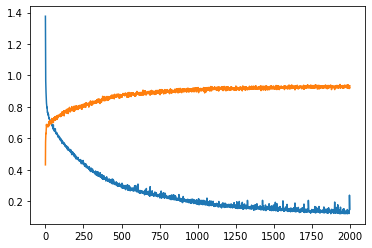

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

target='../content/drive/MyDrive/1-2/caffeine.csv'
df = pd.read_csv(target)

normalization_df=(df-df.mean(numeric_only=True))/df.std(numeric_only=True)

x=normalization_df.iloc[:,0:3]
y=df.iloc[:,4]

y=pd.get_dummies(y)

model = Sequential()
model.add(Dense(36, input_dim=3, activation='selu'))
model.add(Dense(33, activation='tanh'))
model.add(Dense(30, activation='elu'))
model.add(Dense(6,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(x,y, epochs=2000, batch_size=4)

y_loss=history.history['loss']
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_loss)

b_accuracy=history.history['accuracy']
a_len=np.arange(len(b_accuracy))
plt.plot(a_len,b_accuracy)